In [1]:
# from IPython.display import Image

from universal import *

# import other packages needed by the users
# import h5py
# from opmd_viewer import OpenPMDTimeSeries

# Laser Plasma accelerator

In [17]:
def wavelength(ne = 1.0e23, gamma= 1):
    '''
    Parameters
      ne: plasma density, m^-3
    Returns
      lamp: plasma wavelength, meter
    '''
    return 2.*np.pi*g_c*np.sqrt(g_me*g_eps0*gamma**3/ne/g_qe**2)

def plasmaDensity(lam, gamma):
    return gamma**3*g_eps0*g_me/g_qe**2*(2*np.pi*g_c/lam)**2

def wavenumber(ne = 1.0e23 ):
    '''
    Parameters
      ne: plasma density, m^-3
    Returns
      kp: plasma wavenumber, m^-1
    '''
    return 1./(g_c*np.sqrt(g_me*g_eps0/ne/g_qe**2))

def spotsize(z, w0, lambda0):
    '''
    Parameters:
      z: laser position in the forward direction
      w0: laser spot size or waist
      lambda0: laser wavelengt
    Returns:
      w(z): laser spot size at z
    '''
    Zr = np.pi*w0**2/lambda0
    return w0*np.sqrt(1.+z**2/Zr**2)

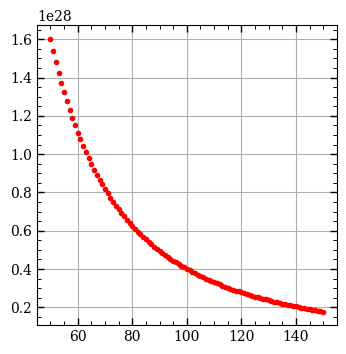

In [14]:
lam = np.linspace(50, 150, 101)
den = plasmaDensity(lam*1e-6, 33)

fig, ax = plt.subplots()
ax.plot(lam, den, '.')
ax.grid()

In [16]:
0.4e28*g_qe*(2*np.pi)**1.5*1e-3*1e-3*1e-3

10.093462819860187

In [21]:
wavelength(1e20, 15/g_mec2+1)/4*1.5

0.20939675596673823

In [13]:
class Laser():
    '''
    Parameters
      a0: strength parameter or normalized potential vector of laser, a0 = eA/mc^2
      w0: laser spot size at focus, meter
      tau0: 1/e length of the amplitude of the laser pulse, meter
      lam0: laser wavelength, meter
      ZR: Rayleigh length, ZR = pi*w0^2/lam0
      EL: peak electric field of laser
      I0: laser peak intensity, W/m^2
      P0: laser peak power, Watt
    '''
    def __init__(self, a0 = 1., w0 = 36e-6, tau0 = 24e-6, lam0 = 0.8e-6):
        '''
        Initiation of the laser pulse
        '''
        self.a0 = a0
        self.w0 = w0  # m
        self.tau0 = tau0  # m
        self.lam0 = lam0 # m
        self.ZR = np.pi*w0**2/lam0
        self.EL = g_me*g_c*2.*np.pi*g_c/lam0/g_qe*a0
        self.I0 = g_c*g_eps0/2.0*(2.0*np.pi*g_me*g_c**2*a0/lam0/g_qe)**2
        self.P0 = np.pi*w0**2/2*self.I0
        return
    def rayleigh_length( self, w0 = 0, lam0 = 0 ):
        '''
        Parameters
          w0: laser waist, meter
          lam0: laser wavelength, meter
        Returns
          ZR: m
        '''
        if np.isscalar(w0):
            if w0 == 0:
                w0 = self.w0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        return np.pi*w0**2/lam0
    def strength2amplitude(self, a0 = 0, lam0 = 0):
        '''
        Parameters
          a0: normalized potential vector of laser, eA/m_e*c^2
          lam0: laser wavelength, meter
        Returns
          EL: peak electric field of laser
        '''
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        return g_me*g_c*2.*np.pi*g_c/lam0/g_qe*a0
    def amplitude2strength(self, EL = 0, lam0 = 0):
        '''
        Parameters
          EL: peak electric field of laser
          lam0: laser wavelength, meter
        Returns
          a0: normalized potential vector of laser, eA/m_e*c^2
        '''
        if np.isscalar(EL):
            if EL == 0:
                EL = self.EL
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        return EL/(g_me*g_c*2.*np.pi*g_c/lam0/g_qe)
    def strength2intensity(self, a0 = 0, lam0 = 0):
        '''
        Parameters
          a0: normalized potential vector of laser, eA/m_e*c^2
          lam0: laser wavelength, meter
        Returns
          I0: W/m^2
        '''
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        return g_c*g_eps0/2.0*(2.0*np.pi*g_me*g_c*g_c*a0/lam0/g_qe)**2
    def intensity2strength(self, I0 = 0, lam0 = 0):
        '''
        Parameters
          I0: laser intensity, watt per meter square
          lam0: laser wavelength, meter
        Returns
          a0: normalized vector potential
        '''
        if np.isscalar(I0):
            if I0 == 0:
                I0 = self.I0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        return np.sqrt(I0/(g_c*g_eps0/2.0))/(2.0*np.pi*g_me*g_c**2/g_qe/lam0)
    def power2intensity(self, P0 = 0, w0 = 0):
        '''
        Parameters
          P0: laser peak power, watt
          w0: laser waist, meter
        Return
          I0: laser peak intensity, watt per m^2
        '''
        if np.isscalar(P0):
            if P0 == 0:
                P0 = self.P0
        if np.isscalar(w0):
            if w0 == 0:
                w0 = self.w0
        return P0/(np.pi*w0**2/2.0)
    def intensity2power(self, I0 = 0, w0 = 0):
        '''
        Parameters
          I0: laser peak intensity, watt per m^2
          w0: laser waist, meter
        Return
          P0: laser peak power, watt
        '''
        if np.isscalar(I0):
            if I0 == 0:
                I0 = self.I0
        if np.isscalar(w0):
            if w0 == 0:
                w0 = self.w0
        return np.pi*w0**2/2.0*I0
    def get_power(self, a0 = 0, w0 = 0, lam0 = 0):
        '''
        Parameters
          a0: normalized potential vector of laser, eA/m_e*c^2
          lam0: laser wavelength, meter
        Returns
          P0: laser peak power, watt
        '''
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        if np.isscalar(w0):
            if w0 == 0:
                w0 = self.w0
        return 1e7/g_c*(a0*2.*np.pi/lam0*w0)**2/16.*g_mec2**2*1e12
    def get_energy(self, a0 = 0, w0 = 0, tau0 = 0, lam0 = 0):
        '''
        Parameters
          a0: normalized potential vector of laser, eA/m_e*c^2
          lam0: laser wavelength, meter
        Returns
          P0: laser peak power, watt
        '''
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        if np.isscalar(tau0):
            if tau0 == 0:
                tau0 = self.tau0
        if np.isscalar(w0):
            if w0 == 0:
                w0 = self.w0
        P0 = self.get_power(a0 = a0, w0 = w0, lam0 = lam0)
        return P0*tau0*np.sqrt(2.*np.log(2))/g_c
class Plasma():
    '''
    Parameters
      ne: plasma density, m^-3
      lamp: wavelenth of the plasma, meter
    '''
    def __init__(self, ne = 1e23):
        '''
        Initiation of the plasma
        '''
        self.ne = ne
        self.lamp = 2.*np.pi*g_c*np.sqrt(g_me*g_eps0/ne/g_qe**2)
    def wavelength( self, ne = 0 ):
        '''
        Parameters
          ne: plasma density, m^-3
        Returns
          lamp: plasma wavelength, meter
        '''
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        return 2.*np.pi*g_c*np.sqrt(g_me*g_eps0/ne/g_qe**2)
class LaserPlasma(Laser, Plasma):
    '''
    Parameters
      a0: strength parameter or normalized potential vector of laser, a0 = eA/mc^2
      w0: laser spot size at focus, meter
      tau0: 1/e length of the amplitude of the laser pulse, meter
      lam0: laser wavelength, meter
      ZR: Rayleigh length, ZR = pi*w0^2/lam0
      EL: peak electric field of laser
      I0: laser peak intensity, W/m^2
      P0: laser peak power, Watt
      ne: plasma density, m^-3
      lamp: wavelenth of the plasma, meter
      E0: mc^2kp/e, magnitude of order of the electric field of the wake field
      Ez: amplitude of the wake field
    '''
    def __init__(self, a0 = 1., w0 = 36e-6, tau0 = 24e-6, lam0 = 0.8e-6, ne = 1e23 ):
        Laser.__init__(self, a0, w0, tau0, lam0)
        Plasma.__init__(self, ne)
        self.E0 = g_me*g_c**2*2.*np.pi/self.lamp/g_qe
        kp_sigmaL = 2.*np.pi/self.lamp*self.tau0/np.sqrt(2)
        self.Eratio = self.a0**2*np.sqrt(np.pi)/4.*kp_sigmaL*np.exp(-kp_sigmaL**2/4.)/np.sqrt(1.+a0**2/2.)
        self.Ez = self.Eratio*self.E0
    def print_all(self):
        print ('The laser parameters: ')
        print ('  strength, a0: '+str.format('%.2f' % self.a0))
        print ('  spot size, w0: '+str.format('%.2f' % (self.w0*1e6))+' um')
        print ('  1/e length, tau0: '+str.format('%.2f' % (self.tau0*1e6))+' um')
        print ('  FWHM length: '+str.format('%.2f' % (self.tau0/g_c*np.sqrt(2.*np.log(2.))*1e15))+' fs')
        print ('  wavelength, lam_0: '+str.format('%.2f' % (self.lam0*1e6))+' um')
        print ('  amplitude, EL: '+str.format('%.2f' % (self.EL/1e9))+' GV/m')
        print ('  intensity, I0: '+str.format('%.2f' % (self.I0/1e18/1e4))+'x10^18 W/cm^2')
        print ('  power, P0: '+str.format('%.2f' % (self.P0/1e12))+' TW')
        print ('The plasma parameters: ')
        print ('  density, np: '+str.format('%.2f' % (self.ne/1e24))+'x10^18 cm^-3')
        print ('  wavelength, lam_p: '+str.format('%.2f' % (self.lamp*1e6))+' um')
        print ('  dephasing_length_1D: '+str.format('%.2f' % (self.linear_dephasing_length()*1e2))+' cm')
        return
    def critical_density( self, lam0 = 0 ):
        '''
        Parameters
          lam0: laser wavelength, meter
        Returns
          nc: plasma criticla density, m^-3
        '''
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        omega0 = 2.0*np.pi*g_c/lam0
        return omega0**2*g_me*g_eps0/g_qe**2
    def critical_power(self, ne = 0, lam0 = 0):
        '''
        Parameters
          ne: plasma density, m^-3
          lam0: laser wavelength, meter
        Returns
          P_c: critical power for relativistic self-focusing
        '''
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        lamp = self.wavelength(ne)
        return 17e9*lamp**2/lam0**2
    def phase_velocity( self, ne = 0, lam0 = 0 ):
        '''
        Parameters
          ne: plasma density, m^-3
          lam0: laser wavelength, meter
        Returns
          beta_p: plasma phase velocity over light velocity in vacuum, 1
        '''
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        nc = self.critical_density(lam0)
        return np.sqrt(1.-ne/nc)
    
    def linear_dephasing_length( self, ne = 0, lam0 = 0 ):
        '''
        Dephasing length for both accelerating and focusing
        Parameters
          ne: plasma density, m^-3
          lam0: laser wavelength, meter
        Returns
          L_p: dephasing length in 1D linear regime, meter
        '''
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        lamp = self.wavelength(ne)
        return lamp**3/2.0/lam0**2
    def linear_depletion_length( self, a0 = 0, ne = 0, tau0 = 0, lam0 = 0 ):
        '''
        Linear depletion length, defined as half of laser energy transfer to plasma wake
        Parameters
          a0: strength parameter or normalized potential vector of laser, a0 = eA/mc^2
          ne: plasma density, m^-3
          tau0: 1/e length of the amplitude of the laser pulse, meter
          lam0: laser wavelength, meter
        Returns
          L_pd: depletion length in linear regime, meter
        '''
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(tau0):
            if tau0 == 0:
                tau0 = self.tau0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        lamp = self.wavelength(ne)
        kp_tau0 = 2.*np.pi/lamp*tau0
        FWHM = tau0*np.sqrt(2.*np.log(2))
        #return lamp**2/lam0**2*tau0/a0**2*(1.*np.sqrt(2*np.log(2)))
        return 8./np.pi/a0**2/kp_tau0**2*2.*np.exp(kp_tau0**2/4.)*(lamp**2/lam0**2)*FWHM*(1.+a0**2/2)
    
    def linear_wake_field(self, a0 = 0, tau0 = 0, ne = 0, lam0 = 0):
        '''
        Parameters
          a0: normalized potential vector of laser, eA/m_e*c^2
          ne: plasma density, m^-3
          tau0: 1/e length of the amplitude of the laser pulse, meter
          lam0: laser wavelength, meter
        Returns
          Eratio: Ez/E0
        '''
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        if np.isscalar(tau0):
            if tau0 == 0:
                tau0 = self.tau0
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        lamp = self.wavelength(ne)
        kp_sigmaL = 2.*np.pi/lamp*tau0/np.sqrt(2)
        E0 = g_me*g_c**2*2.*np.pi/lamp/g_qe
        gamma_perp = np.sqrt(1.+a0**2/2.)
        return E0*a0**2*np.sqrt(np.pi)/4.*kp_sigmaL*np.exp(-kp_sigmaL**2/4.)/gamma_perp
    def linear_field_ratio(self, a0 = 0, tau0 = 0, ne = 0, lam0 = 0):
        '''
        Parameters
          a0: normalized potential vector of laser, eA/m_e*c^2
          ne: plasma density, m^-3
          tau0: 1/e length of the amplitude of the laser pulse, meter
          lam0: laser wavelength, meter
        Returns
          Eratio: Ez/E0
        '''
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        if np.isscalar(tau0):
            if tau0 == 0:
                tau0 = self.tau0
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        lamp = self.wavelength(ne)
        kp_sigmaL = 2.*np.pi/lamp*tau0/np.sqrt(2)
        gamma_perp = np.sqrt(1.+a0**2/2.)
        return a0**2*np.sqrt(np.pi)/4.*kp_sigmaL*np.exp(-kp_sigmaL**2/4.)/gamma_perp
    def linear_energy_gain_with_Eratio( self, Eratio = 0, ne = 0, lam0 = 0 ):
        '''
        Parameters
          Eratio: Ezmax/E0
          ne: plasma density, m^-3
          lam0: laser wavelength, meter
        Returns
          Ek: kinetic energy gain of the beam, MeV
        '''
        if np.isscalar(Eratio):
            if Eratio == 0:
                Eratio = self.Eratio
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        nc = self.critical_density(lam0)
        return 2.*g_mec2*Eratio*nc/ne
    def linear_energy_gain_with_a0( self, a0 = 0, tau0 = 0, ne = 0, lam0 = 0 ):
        '''
        Parameters
          a0: normalized potential vector of laser, eA/m_e*c^2
          ne: plasma density, m^-3
          tau0: 1/e length of the amplitude of the laser pulse, meter
          lam0: laser wavelength, meter
        Returns
          Ek: kinetic energy gain of the beam, MeV
        '''
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(tau0):
            if tau0 == 0:
                tau0 = self.tau0
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        Eratio = self.linear_field_ratio(a0, tau0, ne, lam0)
        nc = self.critical_density(lam0)
        return 2.*g_mec2*Eratio*nc/ne
    def linear_plasma_density_with_Eratio( self, Eratio = 0, Eb = 0, lam0 = 0):
        '''
        Parameters
          Eratio: Ezmax/E0
          Eb: linear energy gain, eV
          lam0: laser wavelength, meter
        Returns
          ne: plasma density, m^-3
        '''
        if np.isscalar(Eratio):
            if Eratio == 0:
                Eratio = self.Eratio
        if np.isscalar(Eb):
            if Eb == 0:
                Eb = self.Eb
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        nc = self.critical_density(lam0)
        return 2.*g_mec2*1e6/Eb*Eratio*nc
    def linear_dephasing_length_with_Eratio( self, Eratio = 0, Eb = 0, lam0 = 0):
        '''
        Parameters
          Eratio: Ezmax/E0
          Eb: linear energy gain, eV
          lam0: laser wavelength, meter
        Returns
          ne: plasma density, m^-3
        '''
        if np.isscalar(Eratio):
            if Eratio == 0:
                Eratio = self.Eratio
        if np.isscalar(Eb):
            if Eb == 0:
                Eb = self.Eb
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        nc = self.critical_density(lam0)
        return lam0/2.*(Eb/2./g_mec2/1e6/Eratio)**1.5
    
    def nonlinear_matched_spot_size( self, a0 = 0, ne = 0, lam0 = 0 ):
        '''
        Parameters
          a0: normalized potential vector of laser, eA/m_e*c^2
          ne: plasma density, m^-3
          lam0: laser wavelength, meter
        Returns
          w0: laser waist, meter
        '''
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        lamp = self.wavelength(ne)
        return lamp*np.sqrt(a0)/np.pi
    def nonlinear_matched_strength_parameter( self, P0 = 0, ne = 0, lam0 = 0 ):
        '''
        Parameters
          P0: laser power, watt
          ne: plasma density, m^-3
          lam0: laser wavelength, meter
        Returns
          a0: normalized vector potential
        '''
        if np.isscalar(P0):
            if P0 == 0:
                P0 = self.P0
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        lamp = self.wavelength(ne)
        return (1./np.pi/g_eps0*P0*g_qe**2/g_me**2/g_c**5*lam0**2/lamp**2)**(1./3)
    
    def nonlinear_dephasing_length( self, a0 = 0, ne = 0, lam0 = 0 ):
        '''
        Parameters
          a0: strength parameter or normalized potential vector of laser, a0 = eA/mc^2
          ne: plasma density, m^-3
          lam0: laser wavelength, meter
        Returns
          L_p_3D: 3D non-linear dephasing length, meter
        '''
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        lamp = self.wavelength(ne)
        kp = 2.0*np.pi/lamp
        return 4.0/3*lamp**2/lam0**2*np.sqrt(a0)/kp
    def nonlinear_energy_gain_with_a0( self, a0 = 0, ne = 0, lam0 = 0 ):
        '''
        Parameters
          a0: normalized potential vector of laser, eA/m_e*c^2
          ne: plasma density, m^-3
          lam0: laser wavelength, meter
        Returns
          Ek: kinetic energy gain of the beam, MeV
        '''
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        lam_p = self.wavelength(ne)
        return 2.0/3*g_mec2*(lam_p/lam0)**2*a0
    def nonlinear_energy_gain_with_power( self, P0 = 0, ne = 0, lam0 = 0 ):
        '''
        Parameters
          P0: laser power, watt
          ne: plasma density, m^-3
          lam0: laser wavelength, meter
        Returns
          Ek: kinetic energy gain of the beam, MeV
        '''
        if np.isscalar(P0):
            if P0 == 0:
                P0 = self.P0
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        nc = self.critical_density(lam0)
        return 2./3*g_mec2*(1./np.pi/g_eps0*P0*g_qe**2/g_me**2/g_c**5)**(1./3)*(nc/ne)**(2./3)

In [14]:
class PlasmaChannel(LaserPlasma):
    def __init__(self, a0 = np.sqrt(2), kp_w0 = 3., kp_sigma0 = np.sqrt(2), lam0 = 0.8e-6, ne = 1.5e23 ):
        
        kp = wavenumber(ne)
        w0 = kp_w0/kp
        tau0 = kp_sigma0/kp*np.sqrt(2)
        
        self.kp_w0 = kp_w0; self.kp_sigma0 = kp_sigma0
        
        LaserPlasma.__init__(self, a0, w0, tau0, lam0, ne)
        
        self.dnrc = 1./np.pi/g_re/w0**2/ne
        self.kappa = 1./(1+4./kp_w0**2)
        return
    def critical_channel_depth(self, ne = 0, kp_w0 = 0):
        '''
        Critical plasma channel depth normalized to the axis plasma density
        Parameters
          ne: plasma density on the axsi
          kp_w0: normalized laser spot size
        Returns
          dnc/ne: critical channel depth normalized to ne
        '''
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(kp_w0):
            if kp_w0 == 0:
                kp_w0 = self.kp_w0
        kp = 2.*np.pi/self.wavelength(ne)
        dnrc = 1./np.pi/g_re/kp_w0**2*kp**2/ne
        return dnrc
    def phase_velocity(self, ne = 0, kp_w0 = 0, lam0 = 0 ):
        '''
        Parameters
          ne: plasma density, m^-3
          lam0: laser wavelength, meter
        Returns
          beta_p: plasma phase velocity over light velocity in vacuum, 1
        '''
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(kp_w0):
            if kp_w0 == 0:
                kp_w0 = self.kp_w0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        nc = self.critical_density(lam0)
        kappa = 1./(1+4./kp_w0**2)
        return np.sqrt(1.-ne/nc/kappa)
    def dephasing_length(self, ne = 0, kp_w0 = 0, lam0 = 0):
        '''
        Dephasing length for both accelerating and focusing
        Parameters
          ne: plasma density, m^-3
          lam0: laser wavelength, meter
        Returns
          L_p: dephasing length in 1D linear regime, meter
        '''
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(kp_w0):
            if kp_w0 == 0:
                kp_w0 = self.kp_w0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        lamp = self.wavelength(ne)
        beta_g = self.phase_velocity(ne, kp_w0, lam0)
        return lamp/4./(1.0-beta_g)
    def depletion_length(self, ne = 0, a0 = 0, kp_sigma0 = 0, lam0 = 0):
        '''
        Returns
          L_pd: depletion length in linear regime, meter
        '''
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(kp_sigma0):
            if kp_sigma0 == 0:
                kp_sigma0 = self.kp_sigma0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        lamp = self.wavelength(ne); kp = 2.*np.pi/lamp
        kp_tau0 = kp_sigma0*np.sqrt(2)
        FWHM = kp_tau0*np.sqrt(2.*np.log(2))/kp
        return 8./np.pi/(a0**2/2.)/kp_tau0**2*2.*np.exp(kp_tau0**2/4.)*(lamp**2/lam0**2)*FWHM #*(1.+a0**2/2)
    def integrand(self, z, ne = 0, a0 = 0, kp_w0 = 0, kp_sigma0 = 0, lam0 = 0):
        '''
        Derivative of energy gain of the laser plasma acccelerator with respect to z
        '''
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(kp_w0):
            if kp_w0 == 0:
                kp_w0 = self.kp_w0
        if np.isscalar(kp_sigma0):
            if kp_sigma0 == 0:
                kp_sigma0 = self.kp_sigma0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        lamp = self.wavelength(ne); kp = 2.*np.pi/lamp
        w0 = kp_w0/kp; tau0 = kp_sigma0/kp*np.sqrt(2); kappa = 1./(1+4./kp_w0**2)
        Ez0 = self.linear_wake_field(a0, tau0, ne, lam0); 
        L_pd0 = self.depletion_length(ne, a0, kp_sigma0, lam0)
        beta_g = self.phase_velocity(ne, kp_w0, lam0)
        return Ez0*(1+z/L_pd0)*np.cos(kp*z*(1-beta_g))
    def energy_gain( self, ne = 0, a0 = 0, kp_w0 = 0, kp_sigma0 = 0, lam0 = 0, z2 = 0, z1 = 0):
        '''
        Energy gain calculated from integration
        '''
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(kp_w0):
            if kp_w0 == 0:
                kp_w0 = self.kp_w0
        if np.isscalar(kp_sigma0):
            if kp_sigma0 == 0:
                kp_sigma0 = self.kp_sigma0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        if z2 == 0:
            kappa = 1./(1+4./kp_w0**2); 
            z2 = self.dephasing_length(ne, kp_w0, lam0)
        ans, err = quad(self.integrand, z1, z2, args = (ne, a0, kp_w0, kp_sigma0, lam0))
        return ans
    def energy_gain2(self, ne = 0, a0 = 0, kp_w0 = 0, kp_sigma0 = 0, lam0 = 0):
        '''
        Maximum energy gain from analytical formula
        '''
        if np.isscalar(ne):
            if ne == 0:
                ne = self.ne
        if np.isscalar(a0):
            if a0 == 0:
                a0 = self.a0
        if np.isscalar(kp_w0):
            if kp_w0 == 0:
                kp_w0 = self.kp_w0
        if np.isscalar(kp_sigma0):
            if kp_sigma0 == 0:
                kp_sigma0 = self.kp_sigma0
        if np.isscalar(lam0):
            if lam0 == 0:
                lam0 = self.lam0
        lamp = self.wavelength(ne); kp = 2.*np.pi/lamp
        w0 = kp_w0/kp; tau0 = kp_sigma0/kp*np.sqrt(2); kappa = 1./(1+4./kp_w0**2)
        Eratio = self.linear_field_ratio(a0, tau0, ne, lam0); 
        L_pd0 = self.depletion_length(ne, a0, kp_sigma0, lam0)
        L_dp0 = self.dephasing_length(ne, kp_w0, lam0)
        return 2*kappa*g_mec2*1e6*Eratio*lamp**2/lam0**2*(1+L_dp0/L_pd0*(1-2./np.pi))

In [16]:
def test_plasmaChannel():
    lpc = PlasmaChannel()
    print(lpc.critical_channel_depth())
    L_dp = lpc.dephasing_length()
    print(L_dp)
    L_pd = lpc.depletion_length()
    print(L_pd)
    print(lpc.energy_gain()/1e9)
    print(lpc.energy_gain2()/1e9)
    print(lpc.linear_wake_field()/1e9*(1+2*0.3/L_pd))
    return
#test_plasmaChannel()

In [18]:
def test_laserPlasma():
    lp = LaserPlasma()
    nc = lp.critical_density()
    beta_p = lp.phase_velocity()
    print(nc, beta_p)
    E0 = lp.strength2amplitude(1)
    print(E0)
    
    #a0 = lp.matched_strength_parameter(200e12)
    #print(a0)
    I0 = lp.strength2intensity(a0)
    print(I0)
    w0 = lp.matched_spot_size(a0)
    print(w0)
    print(np.pi*w0**2/2*I0)
    
    P0 = lp.nonlinear_energy_gain_with_a0(2.0)
    print(P0)
    P0 = lp.nonlinear_energy_gain_with_power(200e12)
    print(P0)
    Pc = lp.critical_power(1e24)/1e12
    print(Pc)
    
    Wacc = lp.linear_energy_gain_with_Eratio(Eratio = 1, ne = 1e23)
    print(Wacc/1e3*np.pi)
    
    ne = lp.linear_plasma_density_with_Eratio(Eratio = 1, Eb = 10e9)
    print(ne/1e6*np.pi)
    
    dp = lp.linear_dephasing_length_with_Eratio(Eratio = 1, Eb = 10e9)
    print(dp*(2./np.pi)**1.5)
    
    return
#test_laserPlasma()